# 케라스로 신경망 작성하기

케라스의 신경망 학습은 크게 두단계로 이뤄진다. 

- 모델 생성
- 모델 학습 / 검증

모델이란 신경망의 구성을 의미한다. 일반적인 입력층, 은닉층, 출력층등의 각각의 계층과 이것을 학습하기 위한 파라미터등이 이 모델에 포함된다. 

<hr style="height:2px" > 

## 가장 심플한 신경망

다음은 가장 간단한 2x2 신경망의 예를 하나 생성해 보았다. 


In [0]:
import keras
from keras import layers
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(layers.Dense(2, activation = 'sigmoid', input_shape = (2,))) 
model.add(layers.Dense(2, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc', 'mae'])      


Using TensorFlow backend.


다음은 이를 학습하는 예이다. 

In [0]:
import numpy as np
x = np.array([[0,1],[1,0]]).astype("float32")
y = np.array([[1,0],[0,1]]).astype("float32")
hist = model.fit(x,y, epochs = 1000, batch_size = 3)

Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.2763 - acc: 1.0000 - mean_absolute_error: 0.2414
Epoch 2/1000
2/2 [==============================] - 0s 987us/step - loss: 0.2758 - acc: 1.0000 - mean_absolute_error: 0.2410
Epoch 3/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2754 - acc: 1.0000 - mean_absolute_error: 0.2407
Epoch 4/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2749 - acc: 1.0000 - mean_absolute_error: 0.2403
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2744 - acc: 1.0000 - mean_absolute_error: 0.2400
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2740 - acc: 1.0000 - mean_absolute_error: 0.2397
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - acc: 1.0000 - mean_absolute_error: 0.2393
Epoch 8/1000
2/2 [==============================] - 0s 996us/step - loss: 0.2731 - acc: 1.0000 - mean_absolute_error: 0.2390
Epoch 9/1000

Epoch 68/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2466 - acc: 1.0000 - mean_absolute_error: 0.2186
Epoch 69/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2462 - acc: 1.0000 - mean_absolute_error: 0.2182
Epoch 70/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2458 - acc: 1.0000 - mean_absolute_error: 0.2179
Epoch 71/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2454 - acc: 1.0000 - mean_absolute_error: 0.2176
Epoch 72/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2449 - acc: 1.0000 - mean_absolute_error: 0.2172
Epoch 73/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2445 - acc: 1.0000 - mean_absolute_error: 0.2169
Epoch 74/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2441 - acc: 1.0000 - mean_absolute_error: 0.2166
Epoch 75/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2437 - acc: 1.0000 - mean_absolute_error: 0.2162
Epoch 76

Epoch 134/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2195 - acc: 1.0000 - mean_absolute_error: 0.1971
Epoch 135/1000
2/2 [==============================] - 0s 916us/step - loss: 0.2191 - acc: 1.0000 - mean_absolute_error: 0.1968
Epoch 136/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2187 - acc: 1.0000 - mean_absolute_error: 0.1965
Epoch 137/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2183 - acc: 1.0000 - mean_absolute_error: 0.1961
Epoch 138/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2179 - acc: 1.0000 - mean_absolute_error: 0.1958
Epoch 139/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2176 - acc: 1.0000 - mean_absolute_error: 0.1955
Epoch 140/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2172 - acc: 1.0000 - mean_absolute_error: 0.1952
Epoch 141/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2168 - acc: 1.0000 - mean_absolute_error: 0.194

Epoch 200/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1945 - acc: 1.0000 - mean_absolute_error: 0.1768
Epoch 201/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1942 - acc: 1.0000 - mean_absolute_error: 0.1765
Epoch 202/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1938 - acc: 1.0000 - mean_absolute_error: 0.1762
Epoch 203/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1934 - acc: 1.0000 - mean_absolute_error: 0.1759
Epoch 204/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1931 - acc: 1.0000 - mean_absolute_error: 0.1756
Epoch 205/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1927 - acc: 1.0000 - mean_absolute_error: 0.1753
Epoch 206/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1923 - acc: 1.0000 - mean_absolute_error: 0.1750
Epoch 207/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1920 - acc: 1.0000 - mean_absolute_error: 0.1747


Epoch 266/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1716 - acc: 1.0000 - mean_absolute_error: 0.1577
Epoch 267/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1712 - acc: 1.0000 - mean_absolute_error: 0.1574
Epoch 268/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1709 - acc: 1.0000 - mean_absolute_error: 0.1571
Epoch 269/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1706 - acc: 1.0000 - mean_absolute_error: 0.1568
Epoch 270/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1702 - acc: 1.0000 - mean_absolute_error: 0.1565
Epoch 271/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1699 - acc: 1.0000 - mean_absolute_error: 0.1563
Epoch 272/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1696 - acc: 1.0000 - mean_absolute_error: 0.1560
Epoch 273/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1693 - acc: 1.0000 - mean_absolute_error: 0.1557


Epoch 332/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1507 - acc: 1.0000 - mean_absolute_error: 0.1399
Epoch 333/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1504 - acc: 1.0000 - mean_absolute_error: 0.1396
Epoch 334/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1501 - acc: 1.0000 - mean_absolute_error: 0.1394
Epoch 335/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498 - acc: 1.0000 - mean_absolute_error: 0.1391
Epoch 336/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 1.0000 - mean_absolute_error: 0.1388
Epoch 337/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1492 - acc: 1.0000 - mean_absolute_error: 0.1386
Epoch 338/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1489 - acc: 1.0000 - mean_absolute_error: 0.1383
Epoch 339/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1486 - acc: 1.0000 - mean_absolute_error: 0.1381


Epoch 398/1000
2/2 [==============================] - 0s 957us/step - loss: 0.1318 - acc: 1.0000 - mean_absolute_error: 0.1235
Epoch 399/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1315 - acc: 1.0000 - mean_absolute_error: 0.1233
Epoch 400/1000
2/2 [==============================] - 0s 801us/step - loss: 0.1313 - acc: 1.0000 - mean_absolute_error: 0.1230
Epoch 401/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1310 - acc: 1.0000 - mean_absolute_error: 0.1228
Epoch 402/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1307 - acc: 1.0000 - mean_absolute_error: 0.1226
Epoch 403/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1305 - acc: 1.0000 - mean_absolute_error: 0.1223
Epoch 404/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1302 - acc: 1.0000 - mean_absolute_error: 0.1221
Epoch 405/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1299 - acc: 1.0000 - mean_absolute_error: 0.1

Epoch 464/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1149 - acc: 1.0000 - mean_absolute_error: 0.1086
Epoch 465/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1147 - acc: 1.0000 - mean_absolute_error: 0.1083
Epoch 466/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1144 - acc: 1.0000 - mean_absolute_error: 0.1081
Epoch 467/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1142 - acc: 1.0000 - mean_absolute_error: 0.1079
Epoch 468/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1139 - acc: 1.0000 - mean_absolute_error: 0.1077
Epoch 469/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1137 - acc: 1.0000 - mean_absolute_error: 0.1075
Epoch 470/1000
2/2 [==============================] - 0s 926us/step - loss: 0.1135 - acc: 1.0000 - mean_absolute_error: 0.1073
Epoch 471/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1132 - acc: 1.0000 - mean_absolute_error: 0.107

Epoch 530/1000
2/2 [==============================] - 0s 951us/step - loss: 0.0998 - acc: 1.0000 - mean_absolute_error: 0.0950
Epoch 531/1000
2/2 [==============================] - 0s 827us/step - loss: 0.0996 - acc: 1.0000 - mean_absolute_error: 0.0948
Epoch 532/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0994 - acc: 1.0000 - mean_absolute_error: 0.0946
Epoch 533/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0992 - acc: 1.0000 - mean_absolute_error: 0.0944
Epoch 534/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0990 - acc: 1.0000 - mean_absolute_error: 0.0942
Epoch 535/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0988 - acc: 1.0000 - mean_absolute_error: 0.0940
Epoch 536/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0986 - acc: 1.0000 - mean_absolute_error: 0.0939
Epoch 537/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0983 - acc: 1.0000 - mean_absolute_error: 0.0

Epoch 596/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0865 - acc: 1.0000 - mean_absolute_error: 0.0829
Epoch 597/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0863 - acc: 1.0000 - mean_absolute_error: 0.0827
Epoch 598/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0861 - acc: 1.0000 - mean_absolute_error: 0.0825
Epoch 599/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0859 - acc: 1.0000 - mean_absolute_error: 0.0823
Epoch 600/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0857 - acc: 1.0000 - mean_absolute_error: 0.0822
Epoch 601/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0856 - acc: 1.0000 - mean_absolute_error: 0.0820
Epoch 602/1000
2/2 [==============================] - 0s 892us/step - loss: 0.0854 - acc: 1.0000 - mean_absolute_error: 0.0818
Epoch 603/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0852 - acc: 1.0000 - mean_absolute_error: 0.081

Epoch 662/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0747 - acc: 1.0000 - mean_absolute_error: 0.0720
Epoch 663/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0746 - acc: 1.0000 - mean_absolute_error: 0.0719
Epoch 664/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0744 - acc: 1.0000 - mean_absolute_error: 0.0717
Epoch 665/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0742 - acc: 1.0000 - mean_absolute_error: 0.0716
Epoch 666/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0741 - acc: 1.0000 - mean_absolute_error: 0.0714
Epoch 667/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0739 - acc: 1.0000 - mean_absolute_error: 0.0713
Epoch 668/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0738 - acc: 1.0000 - mean_absolute_error: 0.0711
Epoch 669/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0736 - acc: 1.0000 - mean_absolute_error: 0.0709


Epoch 728/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0644 - acc: 1.0000 - mean_absolute_error: 0.0624
Epoch 729/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0643 - acc: 1.0000 - mean_absolute_error: 0.0623
Epoch 730/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0642 - acc: 1.0000 - mean_absolute_error: 0.0621
Epoch 731/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0640 - acc: 1.0000 - mean_absolute_error: 0.0620
Epoch 732/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0639 - acc: 1.0000 - mean_absolute_error: 0.0619
Epoch 733/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0637 - acc: 1.0000 - mean_absolute_error: 0.0617
Epoch 734/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0636 - acc: 1.0000 - mean_absolute_error: 0.0616
Epoch 735/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0634 - acc: 1.0000 - mean_absolute_error: 0.0615


Epoch 794/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0555 - acc: 1.0000 - mean_absolute_error: 0.0539
Epoch 795/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0553 - acc: 1.0000 - mean_absolute_error: 0.0538
Epoch 796/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0552 - acc: 1.0000 - mean_absolute_error: 0.0537
Epoch 797/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0551 - acc: 1.0000 - mean_absolute_error: 0.0536
Epoch 798/1000
2/2 [==============================] - 0s 985us/step - loss: 0.0550 - acc: 1.0000 - mean_absolute_error: 0.0535
Epoch 799/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0548 - acc: 1.0000 - mean_absolute_error: 0.0534
Epoch 800/1000
2/2 [==============================] - 0s 937us/step - loss: 0.0547 - acc: 1.0000 - mean_absolute_error: 0.0532
Epoch 801/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - acc: 1.0000 - mean_absolute_error: 0.0

Epoch 860/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0476 - acc: 1.0000 - mean_absolute_error: 0.0465
Epoch 861/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0475 - acc: 1.0000 - mean_absolute_error: 0.0464
Epoch 862/1000
2/2 [==============================] - 0s 944us/step - loss: 0.0474 - acc: 1.0000 - mean_absolute_error: 0.0463
Epoch 863/1000
2/2 [==============================] - 0s 991us/step - loss: 0.0473 - acc: 1.0000 - mean_absolute_error: 0.0462
Epoch 864/1000
2/2 [==============================] - 0s 905us/step - loss: 0.0472 - acc: 1.0000 - mean_absolute_error: 0.0461
Epoch 865/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0471 - acc: 1.0000 - mean_absolute_error: 0.0460
Epoch 866/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0470 - acc: 1.0000 - mean_absolute_error: 0.0459
Epoch 867/1000
2/2 [==============================] - 0s 965us/step - loss: 0.0469 - acc: 1.0000 - mean_absolute_error:

Epoch 926/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0409 - acc: 1.0000 - mean_absolute_error: 0.0400
Epoch 927/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0408 - acc: 1.0000 - mean_absolute_error: 0.0400
Epoch 928/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0407 - acc: 1.0000 - mean_absolute_error: 0.0399
Epoch 929/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0406 - acc: 1.0000 - mean_absolute_error: 0.0398
Epoch 930/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0405 - acc: 1.0000 - mean_absolute_error: 0.0397
Epoch 931/1000
2/2 [==============================] - 0s 941us/step - loss: 0.0404 - acc: 1.0000 - mean_absolute_error: 0.0396
Epoch 932/1000
2/2 [==============================] - 0s 980us/step - loss: 0.0403 - acc: 1.0000 - mean_absolute_error: 0.0395
Epoch 933/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0402 - acc: 1.0000 - mean_absolute_error: 0.0

Epoch 992/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0350 - acc: 1.0000 - mean_absolute_error: 0.0344
Epoch 993/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0349 - acc: 1.0000 - mean_absolute_error: 0.0343
Epoch 994/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0349 - acc: 1.0000 - mean_absolute_error: 0.0343
Epoch 995/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0348 - acc: 1.0000 - mean_absolute_error: 0.0342
Epoch 996/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0347 - acc: 1.0000 - mean_absolute_error: 0.0341
Epoch 997/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0346 - acc: 1.0000 - mean_absolute_error: 0.0340
Epoch 998/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0345 - acc: 1.0000 - mean_absolute_error: 0.0339
Epoch 999/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0345 - acc: 1.0000 - mean_absolute_error: 0.0339


이제 위의 예제를 하나씩 분석해서 신경망 학습의 절차를 보도록 하자. 

<hr>

# 모델 생성

케라스의 모델 생성은 기본적으로 다음과 같은 과정을 거친다. 

1. 모델을 선언
2. 모델에 레이어를 추가 
3. 모델 컴파일


### keras 라이브러리 불러오기

layer는 여러번 쓰게 되므로 keras.layers  를 쓰기 귀찮아서 직접 임포트하였다. 

In [0]:
import keras 
from keras import layers

### 간단한 순차 모델 선언

신경망의 가장 기본이 되는 구조는 순차적으로 레이어를 배치하고 역전파 모델로 이를 학습하는 방법이다. 사실 현대에는 다양한 파생구조가 존재하지만 우선은 이러한 순차모델부터 익혀보자. 

In [0]:
model = keras.models.Sequential() 

이제  model 이라는 변수가 신경망을 의미하게된다.

### 입력 레이어 추가 

가장 간단한 모델로 입력값 두개를 받는 입력 레이어를 생성한다. 이는 model.add 를 이용해 층을 추가함으로서 이루어진다. 

가장 초기부터 널리 사용되는 층은 입력값을 가중치를 곱해 합산후에 필터를 거치는 방식이다. 이러한 층을 케라스에서는 
layers.Dense 로 정의한다. Dense 계층은 기본적으로 node 숫자를 요구한다. 

    layers.Dense([노드숫자],.. 옵션들)

단 중간계층은 전층의 출력에 의해 자동으로 입력이 주어지지만 입력계층은 입력값의 형태를 같이 옵션으로 넣어줘야한다. 이는 다음과 같은 옵션을 사용한다. 아래의 옵션은 2개의 값으로 이뤄진 1차원 배열 형태로 입력값을 끊어서 입력받음을 의미한다. 

    input_shape = (2,)

activation 옵션은 합산된 입력값을 다시 출력값으로 전환하는 과정에서 사용하는 함수로서 이를 활성함수라고 한다. 가장 유명한 함수로 sigmoid 가 있지만 속도등의 이유로 relu 가 기본값으로 입력되어있다. 

    activation = 'relu' 

이제 위의 예에서 사용된 입력 계층을 한번 살펴보자.     

In [0]:
model.add(layers.Dense(2, activation = 'sigmoid', input_shape = (2,))) 

### 출력 레이어 추가 

출력이나 은닉레이어는 자동으로 input_shape 가 결정되므로 input_shape 옵션은 필요로 하지 안는다. 대신 활성화 함수로서 softmax 를 주로 사용하는데 softmax 는 출력값에서 강한 출력값을 더 강화해주고 작은 출력값은 더 작게 만들어준다. 예를 들어 [0.2, 0.7] 을 [0.1, 0.9] 정도로 차이를 강화하는 효과가 있다. 

위의 예에서는 2x2 의 신경망이므로 다음과 같이 출력층을 정의하였다. 

In [0]:
model.add(layers.Dense(2, activation = 'softmax'))

### 모델 컴파일 

모델을 컴파일하는 이유는 정의된 신경망의 학습 옵션을을 정의하고, 가중치의 초기화를 수행하기 위해서이다.이 모델 컴파일에 필수적인 옵션 요소는 다음과 같다. 

    optimizer : 가중치를 업데이트하는 방식으로 경사하강법(sgd),adam, rmsprop 등등이 있음
    loss : 오차를 계산하는 방식 'categorical_crossentropy' ,'squared_mean_error' 등등이 있음
    metircs : loss 이외에 성능 평가를 위한 지표 'acc', 'mae'  등이 있음
  
metrics 는 여러 지표를 선택하기 위해 배열형태로 입력하여야한다. (예: metrics = ['acc', 'mae'] )
    


In [0]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

### 모델 요약 및 초기화 

생성된 모델 정보를 검색하기 위해서는 다음과 같은 함수를 호출하면 된다. 



In [0]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


그런데 주피터에서 작업을 많이 하다보면 모델생성코드를 재실행시 dense 값들이 계속 올라가는 것을 볼 수 있을것이다. 이는 keras 의 밑단이 되는 tensorflow 구조가 계속 누적된다는 의미이며 이것이 학습에 영향을 주는 경우도 있기 때문에 이를 초기화시키려면 다음과 같은 코드를 실행하면 된다. 

In [0]:
keras.backend.clear_session()


<hr> 

# 데이터 입력 및 학습 실행

데이터의 학습은 생각보다 간단하다. model.fit 함수에 입력, 예상 출력 값을 넣어주고 반복시행시 필요한 옵션을 입력하면 된다. 

    model.fit( [x], [y], 반복 옵션.. ) 
    

### 입력데이터(x)의 생성

대부분 파이썬 학습이 그러하듯 케라스도 numpy 데이터를 입력으로 사용한다. 그리고 역시 대부분이 그러하듯 표준데이터는 다음과 같이 전체케이스를  2차원 배열로 한방에 넣는 것을 선호한다. 

만일 다음과 같은 케이스가 있다고 가정하자. 

    x : [0,1]  => y : 0
    x : [1,0]  => y : 1 

이때의 입력데이터 x 는 다음과 같이 정의하면 된다. 

    np.array( [[0,1], [1,0]] ) 
  
만일 입력값이 3개라면 [[0,0,1], [0,1,0], .. ] 형태가 된다. 그리고 대부분의 x 데이터는 실수값이어야 하므로 최종적으로 x 의 형태는 다음과 같다. 

In [0]:
x = np.array( [[0,1], [1,0]] ).astype('float32')

   
### 출력 기대값(y)의 생성

분류(classification) 문제의 경우 출력 값은 해당 클래스를 의미하 경우가 많다.  이런 경우 y를 범주형으로 간주하는데 이 경우는 y값이 0과 1으로 표현되었지만 이를 각각 두개의 서로 다른 노드의 출력으로 유도하기 위해 [0,1] [1,0] 으로 표현한다. 이 역시 되도록이면 실수로 표현하는게 좋으므로 다음과 같이 표현한다. 
       

In [0]:
y = np.array( [[0,1], [1,0]] ).astype('float32')

### 학습 실행 

이제 학습을 위해 model.fit을 실행하기 위한 데이터의 준비가 끝났다. 단 실행시 두가지 반복옵션이 필요하다. 

    epochs : 전체 반복횟수
    batch_size : 한번 반복시 읽어들이는 데이터량 
    
batch_size 는 병렬로 처리되는 케이스 크기로서 작은 입력케이스의 경우 케이스 전체숫자를 한기준으로 하는 경우가 많다. 실제 학습횟수는 케이스의 양은 batch_size * epochs 가 된다.  위의 예제에서는 케이스가 2개이므로 batch_size를 2로 설정하였다.    
    

In [0]:
hist = model.fit(x,y, epochs = 1000, batch_size = 2)

### <font color = 'red'> 연습문제 1-1 : 다음의 데이터를 학습해보세요
    
    x : 0,0,1 -> 1
    x : 1,0,0 -> 2
    x : 0,1,0 -> 3
    
    

In [0]:
## 연습문제 1-1 코드를 여기서 작성해보세요 

<hr style="height:2px" > 

# 은닉층과 xor 문제의 해결

xor 문제는 다층신경망 - 역전파 모델을 탄생시킨 모티브가 된 유명한 문제이다. 이는 입력 x 출력 으로 구성되는 단층 신경망으로는 해결이 불가능하며 이를 위해 다층 신경망이 필요하다. 

이번에는 먼저 문제의 데이터를 정의히자. 

###  xor문제의 입력데이터 

In [0]:
import numpy as np

x = np.array([[0,0], [0,1], [1,0], [1,1]]).astype("float32")
y = np.array([[0,1], [1,0], [1,0], [0,1]]).astype("float32")


### 은닉층을 포함한 신경망 구성 

In [0]:
from keras import models
from keras import layers
keras.backend.clear_session
model = models.Sequential() 
model.add(layers.Dense(2, activation = 'sigmoid', input_shape = (2,)))
model.add(layers.Dense(4))
model.add(layers.Dense(2, activation ='softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

### 학습 실행 

xor는 보기보다 난이도가 있는 문제이다. 그러므로 생각보다 많은 epoch를 요구한다. 

In [0]:
model.fit(x,y, epochs = 1000, batch_size = 4)

Epoch 1/1000
2500/2500 [==============================] - 2s 642us/step - loss: 0.7009 - acc: 0.1880
Epoch 2/1000
2500/2500 [==============================] - 1s 504us/step - loss: 0.6921 - acc: 0.3384
Epoch 3/1000
2500/2500 [==============================] - 1s 511us/step - loss: 0.6891 - acc: 0.5020
Epoch 4/1000
2500/2500 [==============================] - 1s 504us/step - loss: 0.6860 - acc: 0.5732
Epoch 5/1000
2500/2500 [==============================] - 1s 505us/step - loss: 0.6837 - acc: 0.6116
Epoch 6/1000
2500/2500 [==============================] - 1s 512us/step - loss: 0.6824 - acc: 0.6400
Epoch 7/1000
2500/2500 [==============================] - 1s 508us/step - loss: 0.6817 - acc: 0.6480
Epoch 8/1000
2500/2500 [==============================] - 1s 514us/step - loss: 0.6811 - acc: 0.6536
Epoch 9/1000
2500/2500 [==============================] - 1s 515us/step - loss: 0.6806 - acc: 0.6620
Epoch 10/1000
2500/2500 [==============================] - 1s 510us/step - loss: 0.6800 - a

2500/2500 [==============================] - 1s 517us/step - loss: 0.6356 - acc: 0.8840
Epoch 82/1000
2500/2500 [==============================] - 1s 513us/step - loss: 0.6355 - acc: 0.8868
Epoch 83/1000
2500/2500 [==============================] - 1s 507us/step - loss: 0.6355 - acc: 0.8804
Epoch 84/1000
2500/2500 [==============================] - 1s 508us/step - loss: 0.6354 - acc: 0.8732
Epoch 85/1000
2500/2500 [==============================] - 1s 515us/step - loss: 0.6354 - acc: 0.8816
Epoch 86/1000
2500/2500 [==============================] - 1s 518us/step - loss: 0.6354 - acc: 0.8876
Epoch 87/1000
2500/2500 [==============================] - 1s 516us/step - loss: 0.6354 - acc: 0.8828
Epoch 88/1000
2500/2500 [==============================] - 1s 523us/step - loss: 0.6353 - acc: 0.8788
Epoch 89/1000
2500/2500 [==============================] - 1s 518us/step - loss: 0.6353 - acc: 0.8804
Epoch 90/1000
2500/2500 [==============================] - 1s 510us/step - loss: 0.6353 - acc: 0

2500/2500 [==============================] - 1s 501us/step - loss: 0.6347 - acc: 0.8952
Epoch 161/1000
2500/2500 [==============================] - 1s 517us/step - loss: 0.6347 - acc: 0.9140
Epoch 162/1000
2500/2500 [==============================] - 1s 510us/step - loss: 0.6347 - acc: 0.9056
Epoch 163/1000
2500/2500 [==============================] - 1s 511us/step - loss: 0.6347 - acc: 0.9036
Epoch 164/1000
2500/2500 [==============================] - 1s 508us/step - loss: 0.6347 - acc: 0.8988
Epoch 165/1000
2500/2500 [==============================] - 1s 514us/step - loss: 0.6347 - acc: 0.9016
Epoch 166/1000
2500/2500 [==============================] - 1s 511us/step - loss: 0.6347 - acc: 0.9064
Epoch 167/1000
2500/2500 [==============================] - 1s 510us/step - loss: 0.6347 - acc: 0.9020
Epoch 168/1000
2500/2500 [==============================] - 1s 514us/step - loss: 0.6347 - acc: 0.9032
Epoch 169/1000
2500/2500 [==============================] - 1s 512us/step - loss: 0.6347

### 그래프로 모니터링 하기 

반복횟수(epochs)가 1000회가 넘어가면 사실 이 학습이 제대로 이뤄지고 있는지 확인하는 것도 만만한 일이 아니다. 그리고 눈으로 스크롤하며 변화치를 봐서는 이게 제대로 학습이 이루어지고 있는지 확인하기도 어렵다. 이제 이 loss 변화를 직접 눈으로 확인할 수 있는 방법을 알아보자. 

model.fit 은 각 epoch 당 학습의 결과값들을 history형태로 리턴한다. 간단하게 history 의 형태를 보자. 



In [0]:
hist = model.fit(x,y, epochs = 10, batch_size = 40)
print( hist.history )

Epoch 1/10
2500/2500 [==============================] - 0s 50us/step - loss: 0.6343 - acc: 0.8756
Epoch 2/10
2500/2500 [==============================] - 0s 51us/step - loss: 0.6343 - acc: 0.8228
Epoch 3/10
2500/2500 [==============================] - 0s 53us/step - loss: 0.6343 - acc: 0.8052
Epoch 4/10
2500/2500 [==============================] - 0s 53us/step - loss: 0.6343 - acc: 0.8084
Epoch 5/10
2500/2500 [==============================] - 0s 53us/step - loss: 0.6343 - acc: 0.8128
Epoch 6/10
2500/2500 [==============================] - 0s 53us/step - loss: 0.6343 - acc: 0.8084
Epoch 7/10
2500/2500 [==============================] - 0s 53us/step - loss: 0.6343 - acc: 0.8292
Epoch 8/10
2500/2500 [==============================] - 0s 51us/step - loss: 0.6343 - acc: 0.7924
Epoch 9/10
2500/2500 [==============================] - 0s 50us/step - loss: 0.6343 - acc: 0.8280
Epoch 10/10
2500/2500 [==============================] - 0s 54us/step - loss: 0.6343 - acc: 0.8276
{'acc': [0.87560000

tuple 형태로 'loss' 와 'acc' 가 전달된 것을 볼 수 있을 것이다. 이제 이것을 그래프로 표현해보도록 하겠다. 


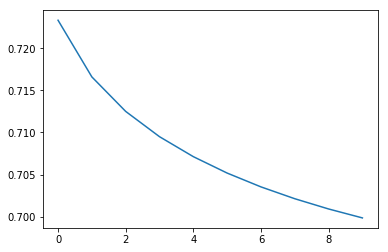

In [0]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'])
plt.show()

이제 학습이 이뤄진 loss 의 변화 과정을 그래프로 한눈에 볼수 있게 되었다. 그런데 학습 결과를 아래로 한참 스크롤 하여 그래프 결과를 보는 것도 상당히 귀찮은 일이다.  이를 위해서 학습 과정시 나오는 바와, 수치 출력을 제거할 수 있는 옵션이 있다. 

    model.fit( ... verbose = 0 )
 
이제 위의 xor 학습을 메시지 없이 그래프 형태로 모니터링하도록 바꿔보자. 


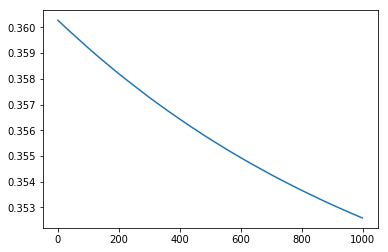

last acc : 0.75


In [0]:
import matplotlib.pyplot as plt 
hist = model.fit(x,y, epochs = 1000, batch_size = 4, verbose  = 0)
plt.plot(hist.history['loss'])
plt.show()
print("last acc :", hist.history['acc'][-1])


 <font color = 'red'> 
### 연습문제 1-2 : xor epoch 최소화 
acc 가  1.0 에 도달한 최초 epoch 를 찾고 batch_size 를 바꾸며 이를 최소화할 수 있게 실행해보자. 
    
    
    

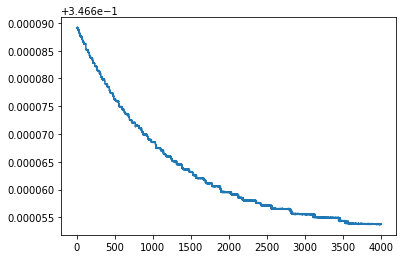

last acc : 0.75
4000


In [0]:
## 연습문제 1-2 코드를 여기에 작성해서 돌려보세요 
import matplotlib.pyplot as plt 
hist = model.fit(x,y, epochs = 4000, batch_size = 4, verbose  = 0)
plt.plot(hist.history['loss'])
plt.show()
print("last acc :", hist.history['acc'][-1])
print( len( hist.history['acc']) )

<hr style="height:2px" > 

#  학습 모델 공간 분포 시각화 

### 학습 결과 활용 하기 

신경망으로 생성된 분류기는 실제 데이터를 판별하기 위해 적용될 수 있다. 학습된 망에 직접 커스텀 데이터를 넣어서 확인하는 방법은 다음과 같다. 


In [0]:
print(model.predict( np.array([[0,1]])))

[[0.49112567 0.5088743 ]]


학습은 0과 1로 이뤄졌지만 신경망은 수학적 실수연산의 네트워크이므로 그 중간값에 대해서도 출력이 가능하다. 당연히 0.5,0.5 도 그 결과값을 리턴한다. 

In [0]:
print(model.predict( np.array([[0.5,0.5]])))

[[0.49142715 0.5085728 ]]


그렇다면 신경망이 학습한 상태공간은 어떻게 구성되어있을까? 직접 보고싶은 생각이 들것이다.  이는 간단하다. x,y 0부터 1까지의 공간의 점을 모두 신경망에 넣어보면 된다. 

물론 평면의 점의 갯수는 무한개지만 일정 간격으로 점을 추출하면 유한개의 점이 추출된다. 하지만 이런 점들의 집합을 어떻게 생성할까? 물론 이중 루프를 돌려서 생성하는 방법도 있다. 하지만 numpy는 좀더 간단한 방법으로 meshgrid 라는 방법을 제공한다. 


[[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 [0.  0.3]
 [0.  0.4]
 [0.  0.5]
 [0.  0.6]
 [0.  0.7]
 [0.  0.8]
 [0.  0.9]
 [0.1 0. ]
 [0.1 0.1]
 [0.1 0.2]
 [0.1 0.3]
 [0.1 0.4]
 [0.1 0.5]
 [0.1 0.6]
 [0.1 0.7]
 [0.1 0.8]
 [0.1 0.9]
 [0.2 0. ]
 [0.2 0.1]
 [0.2 0.2]
 [0.2 0.3]
 [0.2 0.4]
 [0.2 0.5]
 [0.2 0.6]
 [0.2 0.7]
 [0.2 0.8]
 [0.2 0.9]
 [0.3 0. ]
 [0.3 0.1]
 [0.3 0.2]
 [0.3 0.3]
 [0.3 0.4]
 [0.3 0.5]
 [0.3 0.6]
 [0.3 0.7]
 [0.3 0.8]
 [0.3 0.9]
 [0.4 0. ]
 [0.4 0.1]
 [0.4 0.2]
 [0.4 0.3]
 [0.4 0.4]
 [0.4 0.5]
 [0.4 0.6]
 [0.4 0.7]
 [0.4 0.8]
 [0.4 0.9]
 [0.5 0. ]
 [0.5 0.1]
 [0.5 0.2]
 [0.5 0.3]
 [0.5 0.4]
 [0.5 0.5]
 [0.5 0.6]
 [0.5 0.7]
 [0.5 0.8]
 [0.5 0.9]
 [0.6 0. ]
 [0.6 0.1]
 [0.6 0.2]
 [0.6 0.3]
 [0.6 0.4]
 [0.6 0.5]
 [0.6 0.6]
 [0.6 0.7]
 [0.6 0.8]
 [0.6 0.9]
 [0.7 0. ]
 [0.7 0.1]
 [0.7 0.2]
 [0.7 0.3]
 [0.7 0.4]
 [0.7 0.5]
 [0.7 0.6]
 [0.7 0.7]
 [0.7 0.8]
 [0.7 0.9]
 [0.8 0. ]
 [0.8 0.1]
 [0.8 0.2]
 [0.8 0.3]
 [0.8 0.4]
 [0.8 0.5]
 [0.8 0.6]
 [0.8 0.7]
 [0.8 0.8]
 [0.8 0.9]
 [0.9 0. ]

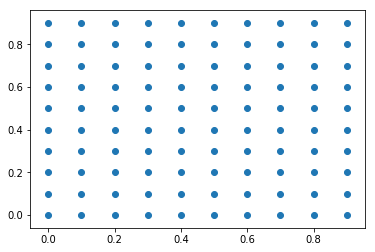

In [0]:
import matplotlib.pyplot as plt 

x = np.mgrid[0:1:0.1, 0:1:0.1].reshape(2,-1).T
print(x)
plt.scatter(x[:,0], x[:,1])
plt.show()

이번에는 x를 model에 입력한 결과값을 한번 보자. 

In [0]:
y = model.predict(x)
print(y)

[[2.3139452e-07 9.9999976e-01]
 [5.7980502e-03 9.9420196e-01]
 [2.2457996e-01 7.7542007e-01]
 [4.2792699e-01 5.7207298e-01]
 [4.7797793e-01 5.2202207e-01]
 [4.8842287e-01 5.1157713e-01]
 [4.9057120e-01 5.0942880e-01]
 [4.9101233e-01 5.0898772e-01]
 [4.9110249e-01 5.0889748e-01]
 [4.9112177e-01 5.0887823e-01]
 [2.0545186e-04 9.9979454e-01]
 [9.2009276e-02 9.0799075e-01]
 [3.7103412e-01 6.2896591e-01]
 [4.6559009e-01 5.3440994e-01]
 [4.8586410e-01 5.1413596e-01]
 [4.9004644e-01 5.0995356e-01]
 [4.9090534e-01 5.0909466e-01]
 [4.9108055e-01 5.0891948e-01]
 [4.9111769e-01 5.0888234e-01]
 [4.9112466e-01 5.0887537e-01]
 [2.5312753e-02 9.7468728e-01]
 [2.9273164e-01 7.0726836e-01]
 [4.4670200e-01 5.5329806e-01]
 [4.8194200e-01 5.1805800e-01]
 [4.8924401e-01 5.1075596e-01]
 [4.9074134e-01 5.0925869e-01]
 [4.9104753e-01 5.0895250e-01]
 [4.9111003e-01 5.0889003e-01]
 [4.9112356e-01 5.0887644e-01]
 [4.9112567e-01 5.0887430e-01]
 [3.2032409e-01 6.7967594e-01]
 [4.5295212e-01 5.4704791e-01]
 [4.8336

위의 결과는 단순한 신경망의 출력값이다. 물론 이 값에서 앞의 값이 더 크면 0, 뒤의 값이 더 크면 1로 간주해도 좋을 것이다. 그렇지만 이것을 시각화하려면 0,1.. 등의 값이 필요하다. 어떻게 해야할까?  

물론 모든것이 그러하듯 하드코딩해도 상관은 없을 테지만.. 코드가 복잡해지는걸 막기위해서 여기서는 해 배열중에 가장 큰 배열의 인덱스 값을 출력하는 numpy 함수인 argmax 를 이용하도록 하겠다. 단 가로축(axis=1) 기준으로 큰 값의 인덱스를 생성하도록 다음과 같이 사용한다. 

In [0]:
print(np.argmax(y, axis = 1 ))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]


이제 준비가 다 되었다. xor 신경망이 생성한 상태공간의 모습을 직접 보는 전체 코드를 보자. 

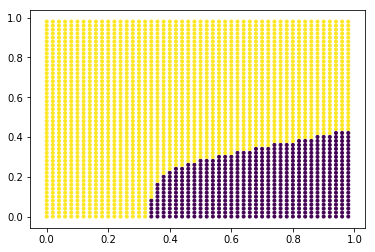

In [0]:
import matplotlib.pyplot as plt 

x = np.mgrid[0:1:0.02, 0:1:0.02].reshape(2,-1).T
y = model.predict(x)
plt.scatter(x[:,0], x[:,1], marker = '.', c = np.argmax(y, axis = 1))
plt.show()

 <font color = 'red'> 
### 연습문제 1-3 : 신경망으로 그림 그리기 
신경망의 학습 샘플을 생성해 다양한 형태의 상태공간모양을 만들어보자. 
    
    
    